# Unsupervised Machine Learning

An extensive Principal Component Analysis (PCA) report on the 'USArrests' dataset, containing  Violent Crime Rates by US cities, aiming to explore its nuances comprehensively. Additionally, the project includes applying two clustering techniques -  the K-Nearest Neighbours (KNN) method and hierarchical clustering - and analysing the clusters they generate. Through this multifaceted analysis, the project aims to uncover insights into the dataset's  structure and patterns while demonstrating proficiency in PCA and clustering methodologi.s


In [8]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# load the dataset and view it

df = pd.read_csv('UsArrests.csv')

df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Data Exploration and Preprocessing

In [10]:
# get data shape
print(df.shape)
print()

# get data info and view datatypes
print(df.info())
print()

# get dataframe size
print(df.shape)
print()

# check for missing data
print(df.isnull().sum())
print()

# get statistical properties (relevant rows)
stat = df.describe()
rel_stats = stat.loc[["mean","std","min","max"]].transpose() 
print(rel_stats)

(50, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB
None

(50, 5)

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

             mean        std   min    max
Murder      7.788   4.355510   0.8   17.4
Assault   170.760  83.337661  45.0  337.0
UrbanPop   65.540  14.474763  32.0   91.0
Rape       21.232   9.366385   7.3   46.0


In [11]:
# set 'city' column as dataframe index
df.set_index('City', inplace = True)

### Histoplots of the Distribution of Data for each Feature

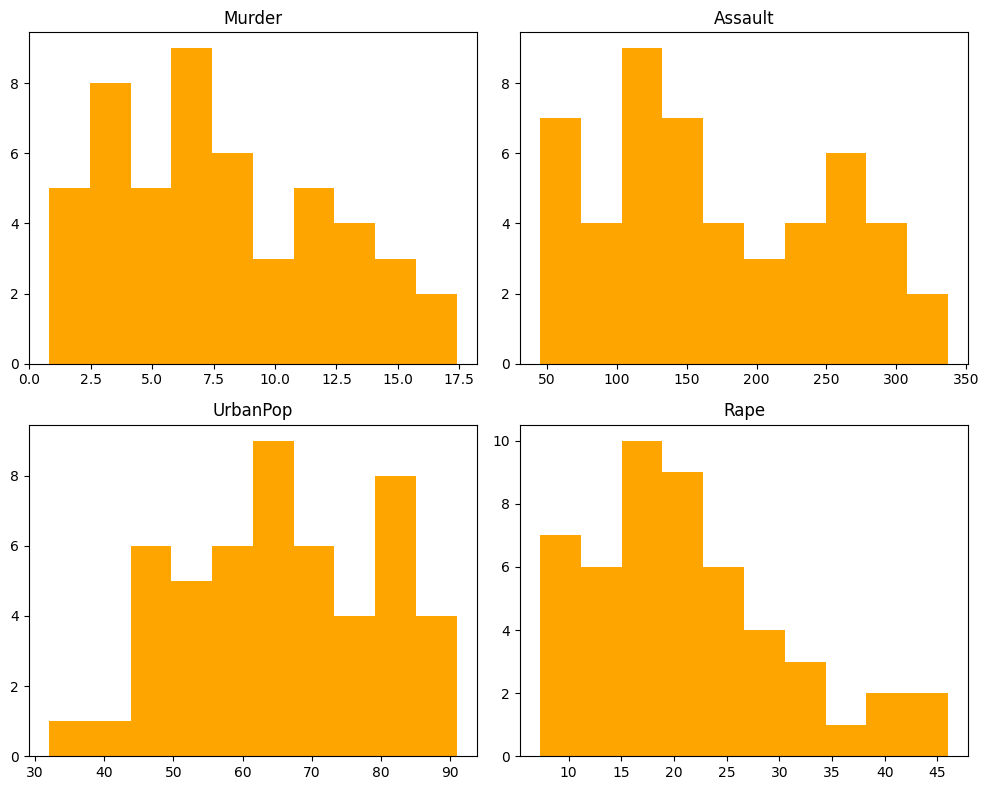

In [12]:
# Plot histograms
df.hist(grid=False, figsize=(10, 8), color='orange')
plt.tight_layout()
plt.show()

The 'US Arrests' dataset comprises 50 rows and 5 columns, showcasing notable variations across variables. Mean values differ significantly among the four variables, indicating diverse distributions. Similarly, the variances vary considerably, suggesting differing levels of dispersion within the dataset. Notably, the "UrbanPop" variable, representing the urban population percentage per state, stands out as incomparable to metrics such as murder, rape, or assault rates per 100,000 individuals. Furthermore, the dataset is devoid of any null values, ensuring data completeness and reliability.

### Data Analysis - Crime Rates (Murder, Rape, Assult) & Urban Population in each City

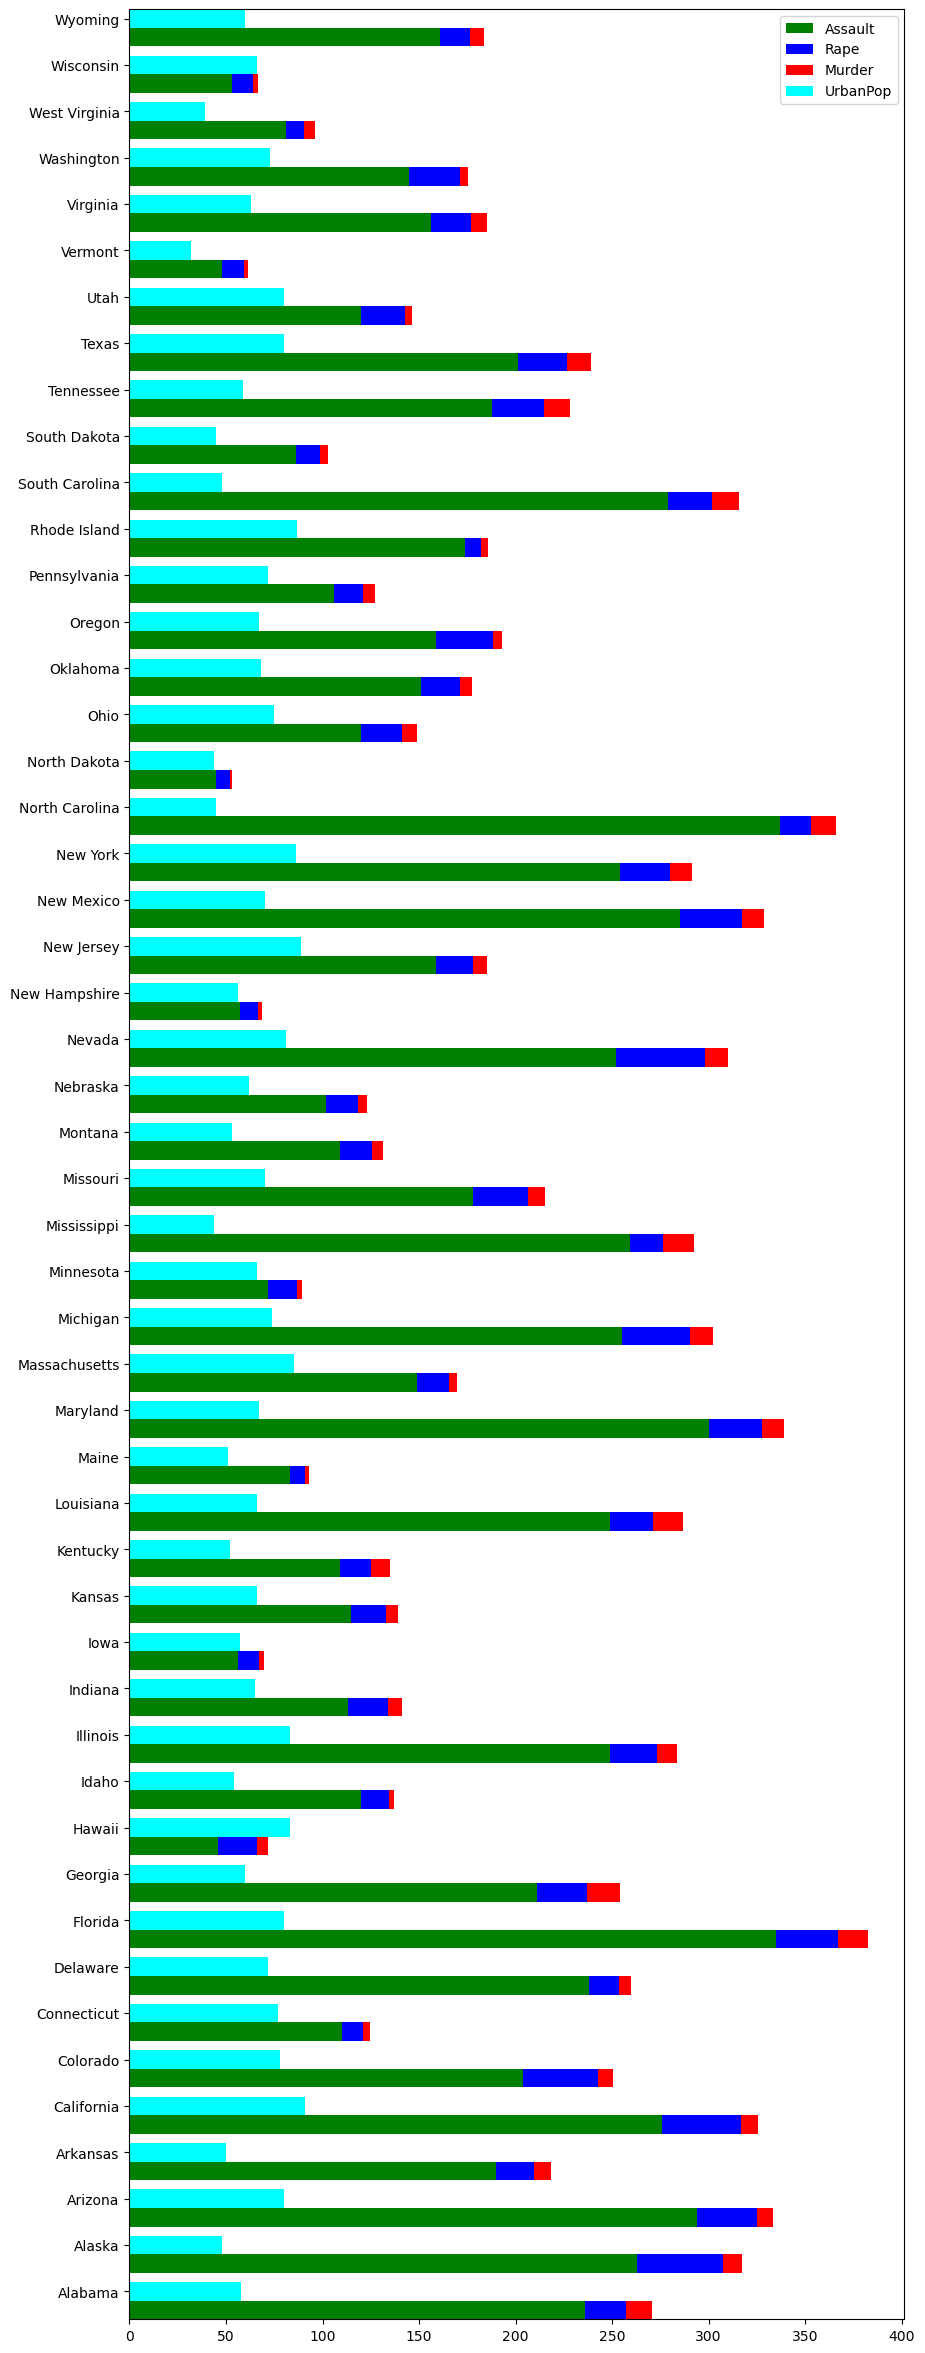

In [13]:
fig, ax = plt.subplots(figsize=(10,30))
y = np.arange(len(df.axes[0]))  # the label locations
bar_height = 0.4  # the height of the bars

# set the position of the bars on the y-axis
bar_positions = y - bar_height

assult = ax.barh(bar_positions, df.Assault, bar_height, color = 'g')
rape = ax.barh(bar_positions, df.Rape, bar_height, color = 'b', left=df.Assault)
murder = ax.barh(bar_positions, df.Murder, bar_height, color = 'r', left=df.Assault+df.Rape)
urbanpop = ax.barh(bar_positions + bar_height, df.UrbanPop, bar_height, color = 'cyan')

ax.set_yticks(y)  # set the y-ticks to be at the same position as the bars
ax.set_yticklabels(df.axes[0])  # set the y-tick labels to be the labels of the dataframe

plt.legend(['Assault','Rape','Murder','UrbanPop'])
plt.margins(y=0)
plt.show()

The bar chart above yields the following insights:

- Highest Assault Rate: Florida and North California.

- Lowest Assault Rate: Hawaii, North Dakota, Vermont, New Hampshire, and Wisconsin.

- Highest Rape Rate: Nevada and Alaska.

- Lowest Rape Rate: Maine, North Dakota, Vermont, Connecticut, New Hampshire, Wisconsin, Rhode Island, and West Virginia.

- Highest Murder Rate: Georgia and Mississippi.

- Lowest Murder Rate: Idaho, Iowa, Maine, New Hampshire, North Dakota, Vermont, and Wisconsin.

- Highest UrbanPop Rate: Nevada and Alaska.

- Lowest UrbanPop Rate: Maine, North Dakota, Vermont, Connecticut, New Hampshire, Wisconsin, Rhode Island, and West Virginia.

### Correlation Analysis

Visualize a correlation matrix to examine the interrelationships among the different features within the dataset.

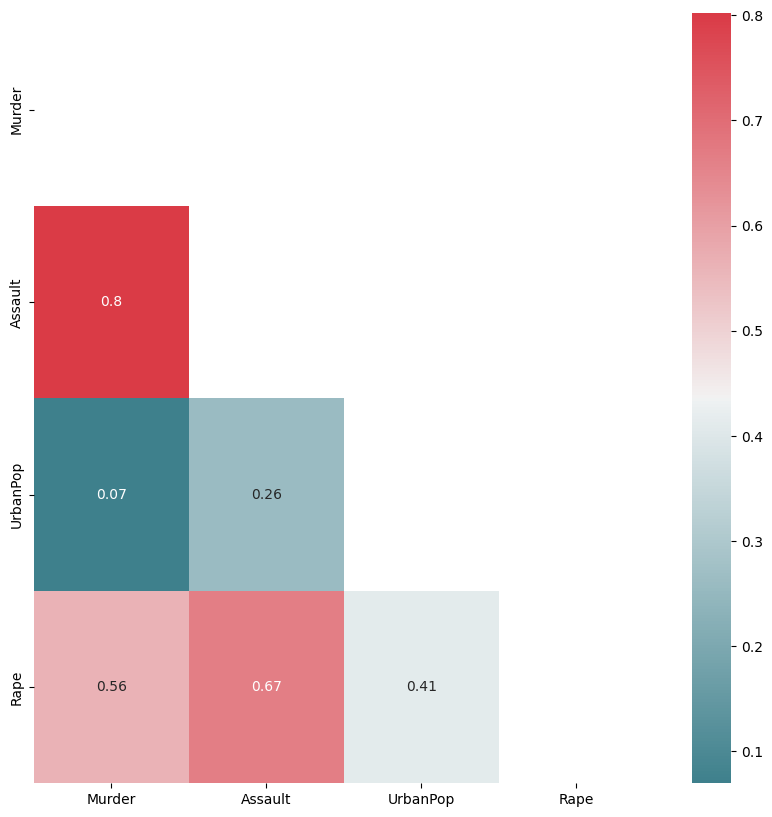

In [14]:
cities = df.index
corr_df = df.corr()
labels = corr_df.columns

# mastop half matrix
mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool) # mask top half matrix

# plot of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap= sns.diverging_palette(210, 10, as_cmap=True))
plt.show()

The correlation heatmap reveals several noteworthy patterns within the dataset. Firstly, there exists a highly positive correlation between the arrest rates for assault and murder (0.8), indicating a strong relationship between these two variables. Similarly, the arrest rate for assault demonstrates a robust positive correlation with the rate of arrests for rape (0.67). Additionally, a moderate positive correlation is observed between the arrest rates for murder and rape (0.56). Furthermore, the urban population percentage exhibits a moderate positive correlation with the arrest rate for rape (0.41), suggesting a potential association between urbanization and this particular crime. However, its correlation with assault arrests is weaker (0.26), and almost negligible with murder arrests (0.07). These findings shed light on the interrelationships between different crime rates and urban demographics within the dataset.

### PCA

Due to the strong correlations observed among the input variables in the dataset, PCA becomes particularly advantageous. This dimensionality reduction technique will transform the original features into a new set of uncorrelated variables called principal components. By doing so,  the most significant patterns of variation in the data will be captured and redundancy will be minimized. In the context of highly correlated input data, PCA can help alleviate multicollinearity issues, where predictors are interrelated, by creating orthogonal components that retain as much of the variance in the original data as possible. This process allows for a more compact representation of the dataset, facilitating easier interpretation and potentially improving the performance of subsequent analysis or modeling tasks. Therefore, applying PCA becomes a valuable strategy to streamline the dataset and enhance the efficiency and effectiveness of downstream analytical processes (HyperionDev, 2021).

In [15]:
# set float data to be displayed with 2 decimal points
np.set_printoptions(precision=2)

# select data to be transformed - without 'City' column
X = df.values.squeeze()

# create PCA transform model
pca = PCA()

# fit the model
X_trans = pca.fit_transform(X)

# create a new datafrom of the transformed data
df_pca = pd.DataFrame(X_trans)

# view the data
df_pca.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [16]:
std = df_pca.describe().transpose()["std"]

print(f"Standard deviation: {std.values}")

print(f"\nProportion of Variance Explained: {pca.explained_variance_ratio_}")

print(f"\nCumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Standard deviation: [83.73 14.21  6.49  2.48]

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


#### Biplot

This biplot will display the significance of each feature through the length of the arrows. Longer arrows indicate higher importance, which corresponds to larger values in the eigenvectors.

In [17]:
# biplot function

def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(15, 15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)
    
    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    
    # Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.

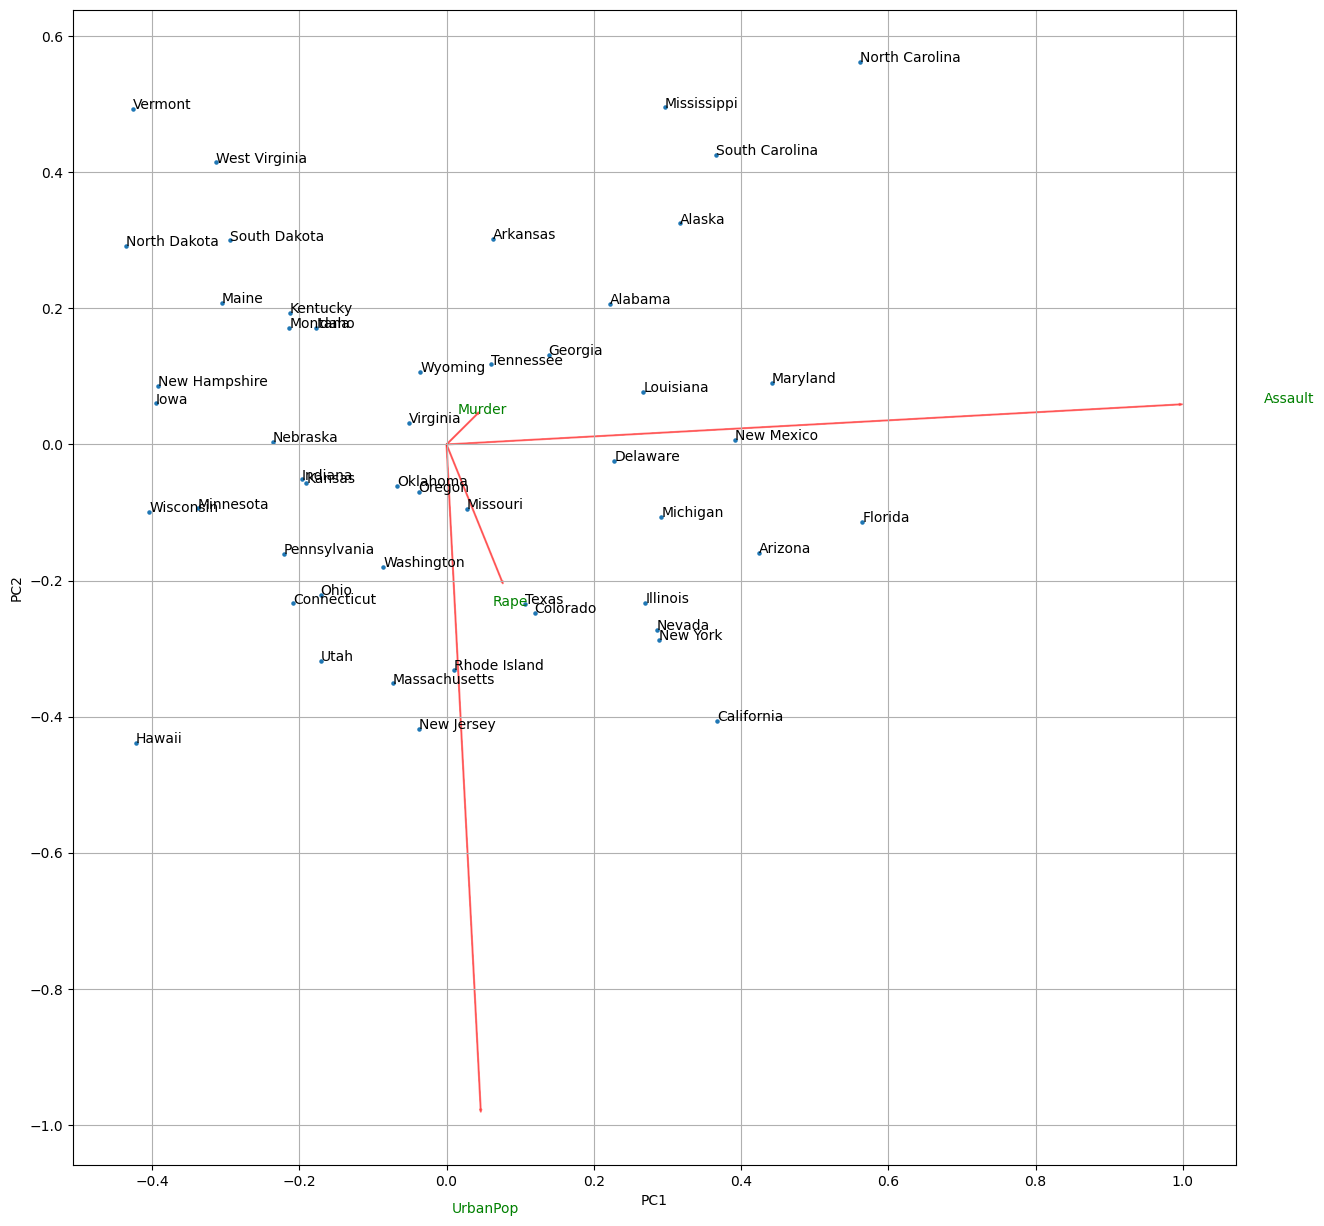

In [18]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

In analyzing this biplot, it is apparent that Assault and UrbanPop emerge as the most significant features, as their corresponding arrows are the longest in the visualization.

The above infromation can be quanified as follows:

In [19]:
# Feature importance

# adjust the precision to see more decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

#components x features - access at index 0 to get the first component
pc1 = abs( pca.components_[0] ) 
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


Based on the above table, it appears that Assault significantly influences the first principal component, whereas UrbanPop holds the greatest significance in the second component. These findings align with the observations drawn from the biplot analysis. Additionally, when considering the summarized statistics previously mentioned, it's notable that the mean values associated with these features markedly surpass those of others. Consequently, there's a possibility that these features overshadow others, potentially leading to their disregard in the analysis.

### Standardised data

To mitigate the dominance of certain features, we standardize the data, ensuring each feature contributes proportionately to the analysis without being overwhelmed by others.

In [20]:
# create the standardisaiont model and fit the data
X_std = StandardScaler().fit_transform(X)

# creat the PCA model for the standardised data and fit it
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)


# create a dataframe of the standardised and fitted data - view it
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


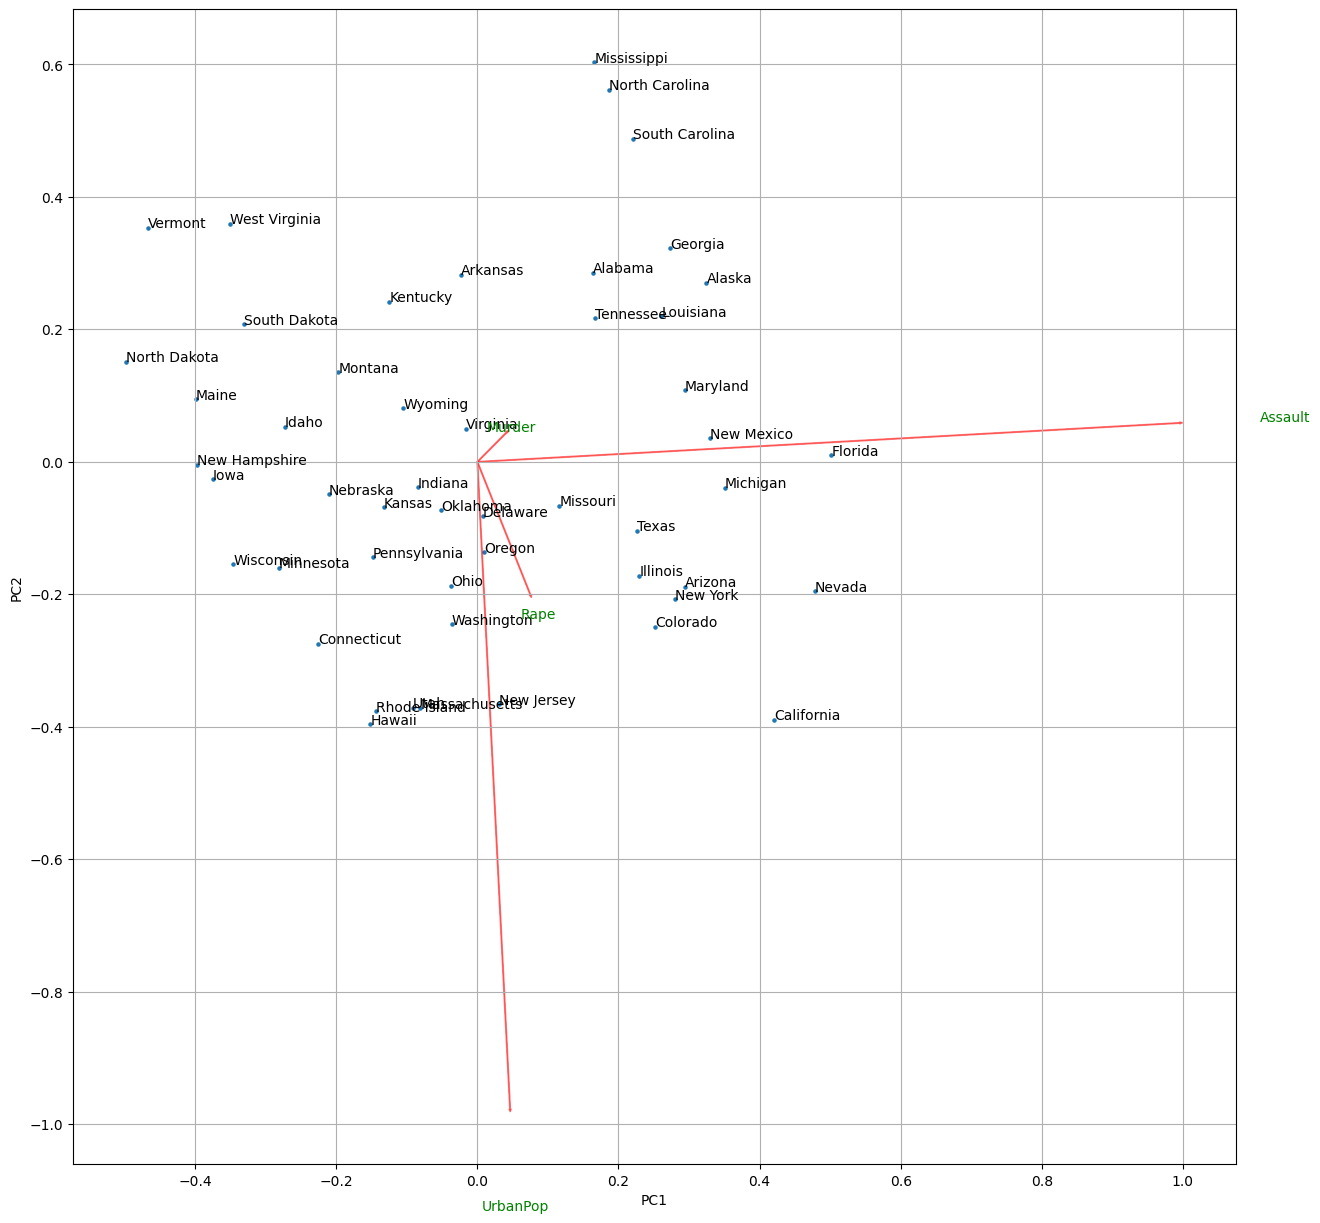

In [21]:
# plot the biplot of the standardised PCA model
biplot(X_std_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels))
plt.show()

In the results derived from the standardized data, a more diverse set of variables is utilized to explain the variance observed. This shift is attributed to the reduced influence of previously dominant large numbers on the analysis.

Let's compart the quinitifed feature importance once again.

In [22]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) 
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Upon reviewing the feature importance now, it appears that the majority of variables contribute relatively evenly, with UrbanPop and Rape demonstrating lower significance.

#### Cummulative Variance and Scree plots for component number selection

The cummulative variance an scree plots will effectively aid in selecting the appropriate number of principal components.

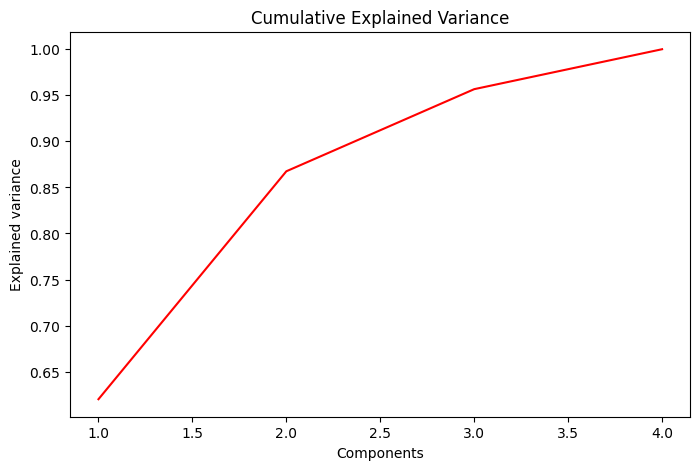

In [23]:
# Cumulative variance plot
plt.figure(figsize=(8,5))
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")
plt.show()

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.

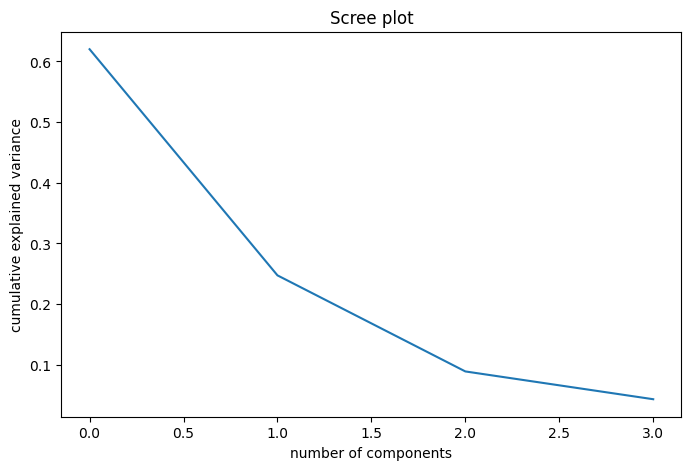

In [24]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.

Based on the above plots, it appears that the combined influence of the first three principal components accounts for approximately 95% of the overall variance. Consequently, we can confidently utilize these components for conducting cluster analysis.

### Clustering

Two clustering techniques were employed, and the clusters were scrutinized to identify any shared characteristics or discrepancies between the techniques.

In [25]:
# creation of datframe consisting of principal components only - view it
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


#### K Means clustering

Determining the optimal number of clusters with the aid of an elbow plot.

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


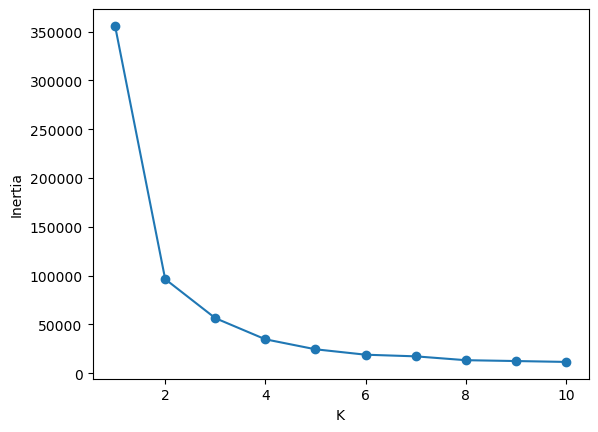

In [26]:
# function - kmeans model
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, n_init = 'auto' )
    kmeans.fit(x)
    return kmeans.inertia_

# function -  elbow plot
def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# plot elbow curve
elbow_Kmeans(X)

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.

An elbow plot was generated with k values ranging from 2 to 10, revealing an elbow pattern between k=2 to k=4. However, within this elbow range, determining the most optimal value is uncertain. 

To address this ambiguity, further investigation using the silhouette score can help identify likely candidates for the optimal number of clusters. The first two components were plotted for the Kmeans scatter plot. 

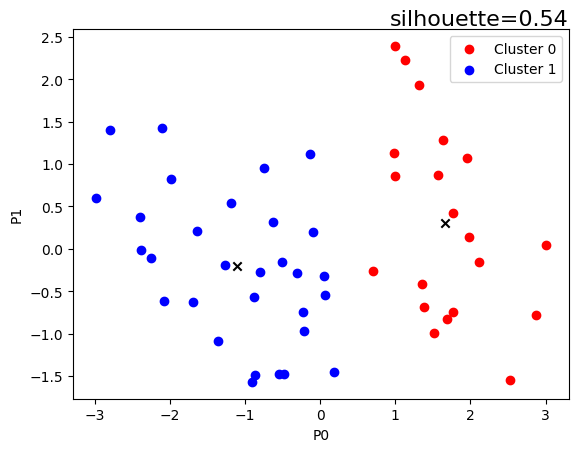

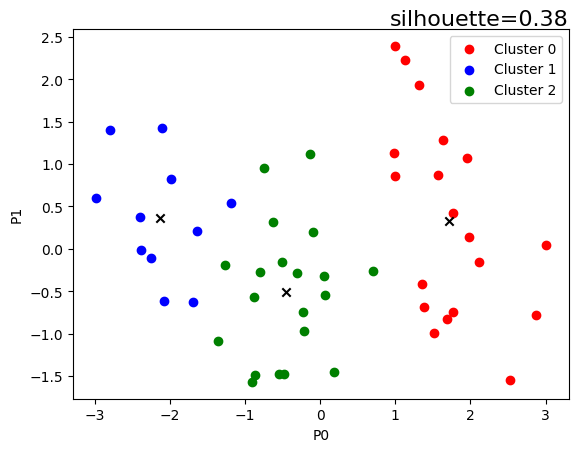

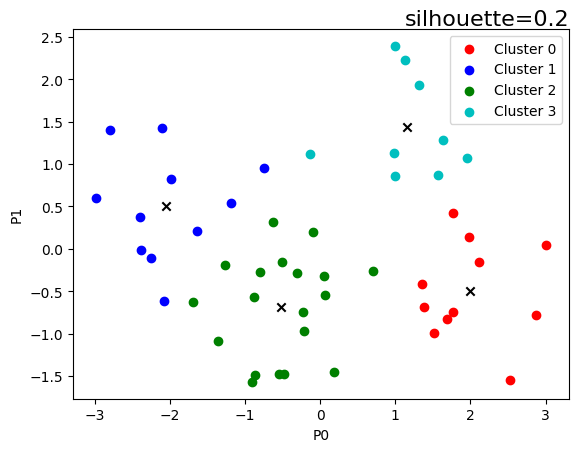

In [27]:
'''function that builds Kmeans model (given X, k and r), then calculates accuracy score and 
creates a scatter plot showing the predicted clusters of the model'''

# select data for clustering - 1D array
x_1 = pca_df[[0,1]].values.reshape(-1,2)

def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r, n_init = 'auto')
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('P0')
    plt.ylabel('P1')
    plt.legend()
    plt.show()

# scatter plot to be plot for range of k values
for k in range(2,5):
  scatter_Kmeans(x_1, k, r=0)

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.

The analysis of the scatter plots indicates that the highest silhouette score is achieved when k=2. In the corresponding visual representations, two clearly delineated clusters are discernible, with ample space between them indicating distinctiveness. Conversely, for k=3 and k=4, the clusters appear closer together and lack the same degree of distinctiveness.

K Means Cluster Plot

Text(0, 0.5, 'Dim 1')

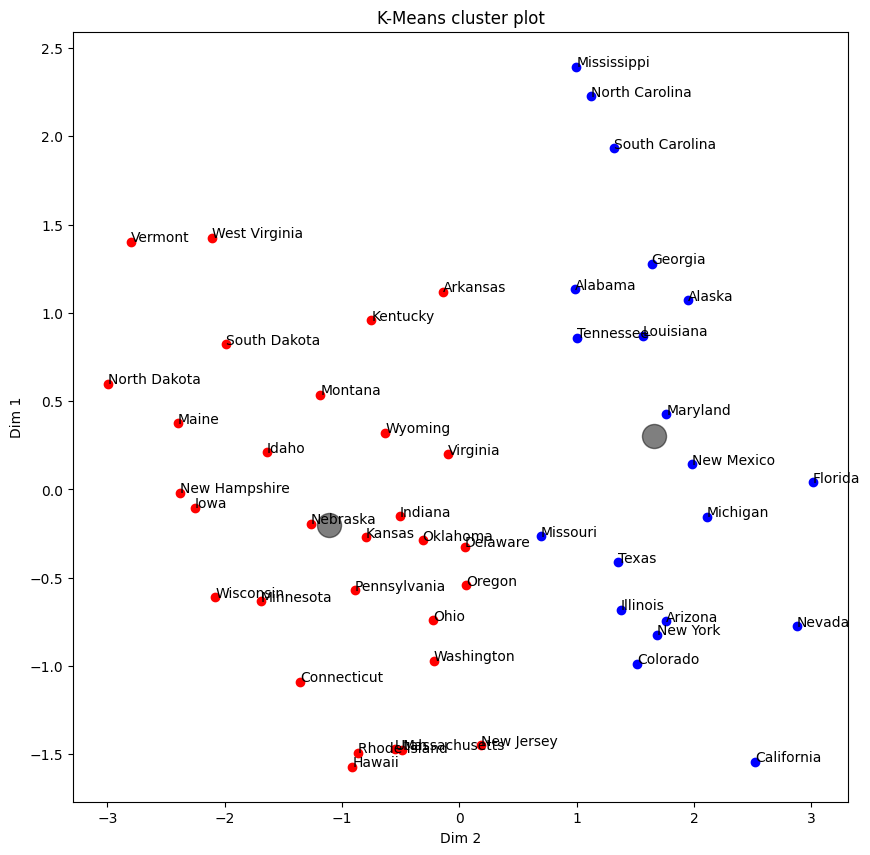

In [35]:
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(10,10))
colours = 'rb'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i])
    ax.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='o', c = "black", s=300, alpha=0.5)
    
for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")    

# Adapted from: https://www.kaggle.com/code/sanikamal/principal-component-analysis-with-kmeans

Boxplots to display distribution of crime rates for the states in cluster 0 and cluster 1.

<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

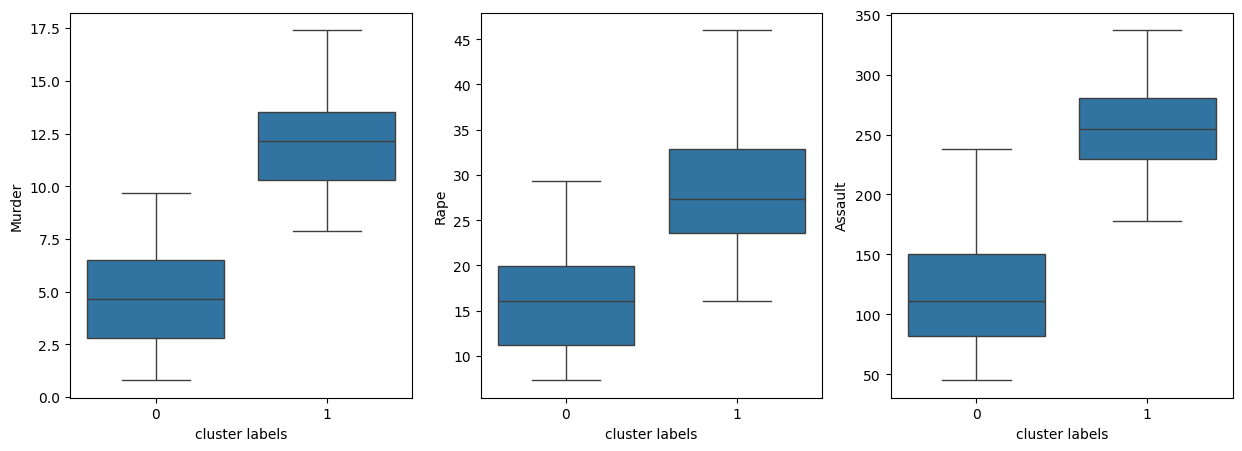

In [29]:
df['cluster labels'] = cluster_labels
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
sns.boxplot(x='cluster labels', y='Murder', data=df, ax=ax[0])
sns.boxplot(x='cluster labels', y='Rape', data=df, ax=ax[1])
sns.boxplot(x='cluster labels', y='Assault', data=df, ax=ax[2])

Based on the analysis of the box plots presented above, discernible trends emerge regarding the states categorized into Group-0 and Group-1.

- Group-0 cities exhibit characteristics indicative of low-risk profiles, demonstrating notably lower incidences of murders, assaults, and rapes compared to the states comprising Group-1. 


- Conversely, Group-1 cities depict elevated levels of these crimes, suggesting a higher risk environment within this cohort. Consequently, Group-1 cities may warrant classification as high-risk areas due to their comparatively elevated crime rates. 

Cities that belong to group 0 and grou 1 respectively:

In [36]:
# for loop to get the city name for each data point
for i in range(k):
    group_indices = np.argwhere(cluster_labels==i).transpose()[0]
    group = np.array(cities)[group_indices]
    print(f'Group {i} Cities:', *group, sep=", ")
    print("\n")  

Group 0 Cities:, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming


Group 1 Cities:, Alabama, Alaska, Arizona, California, Colorado, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Missouri, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas




The agreement between the box plot and the previously conducted bar plot analysis signifies a congruence in the derived insights regarding the dataset. This consistency across distinct visualization methodologies lends credence to the validity of the observed trends or patterns. Such concordance reinforces the robustness of the analytical findings, bolstering the confidence in the accuracy of the interpretations drawn from the data.

#### Hierarchical clustering

Determining the optimal number of clusters with the aid of a dendogram (visualisation) that employing the three common linkage criteria (single, averagea and complete) and two common types of distance metrics (euclidian and city block).

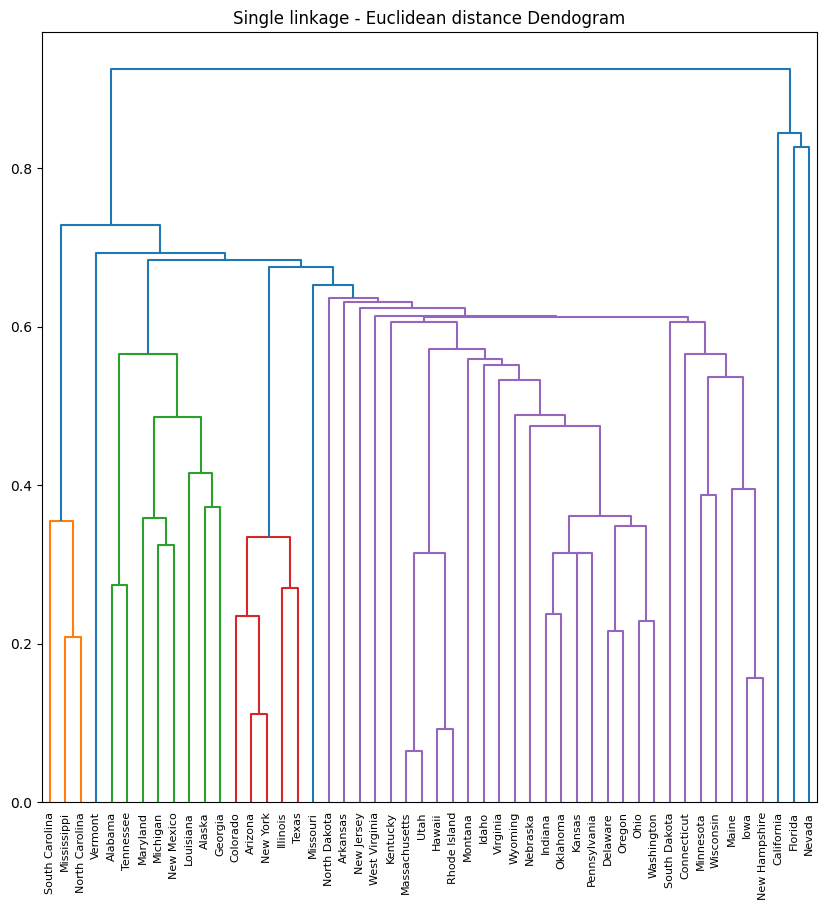

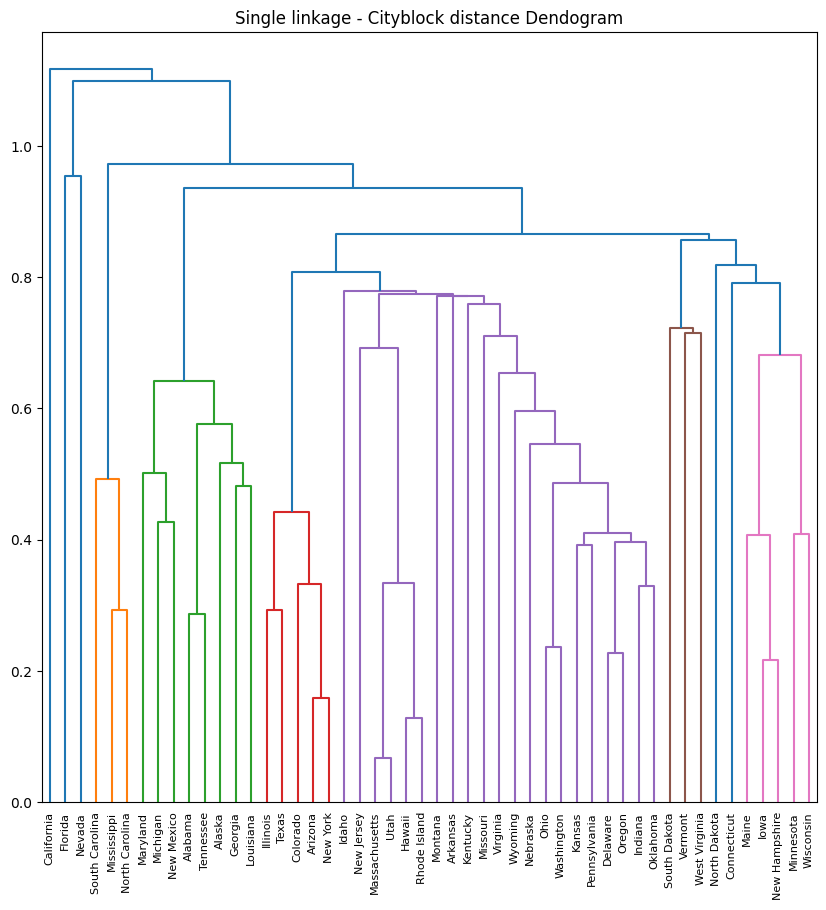

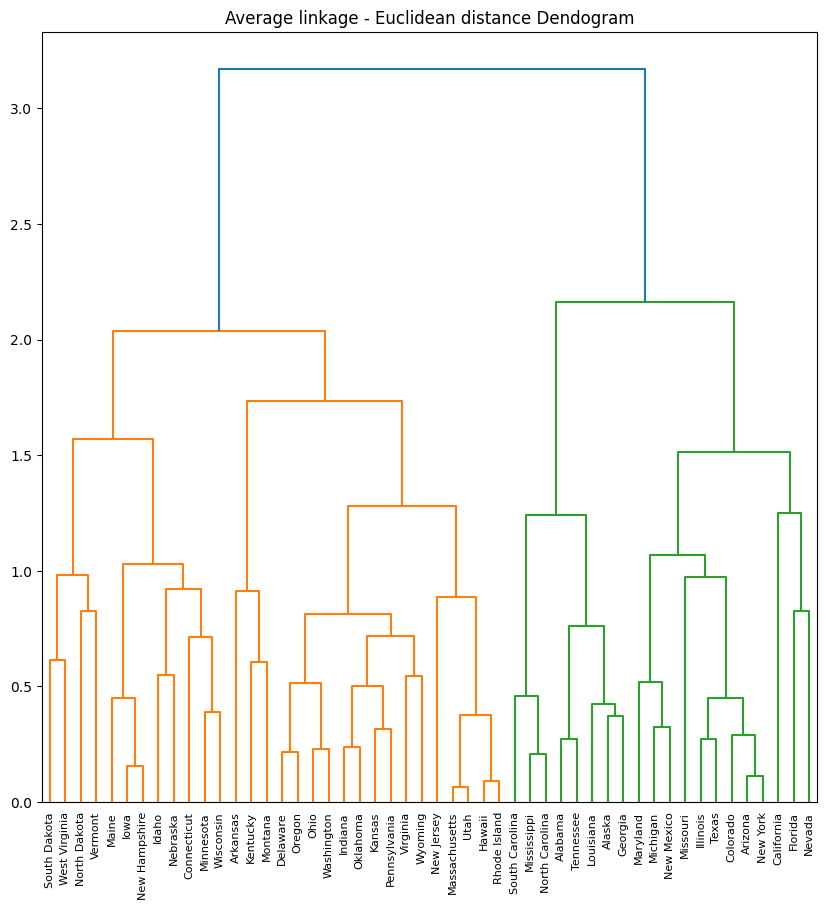

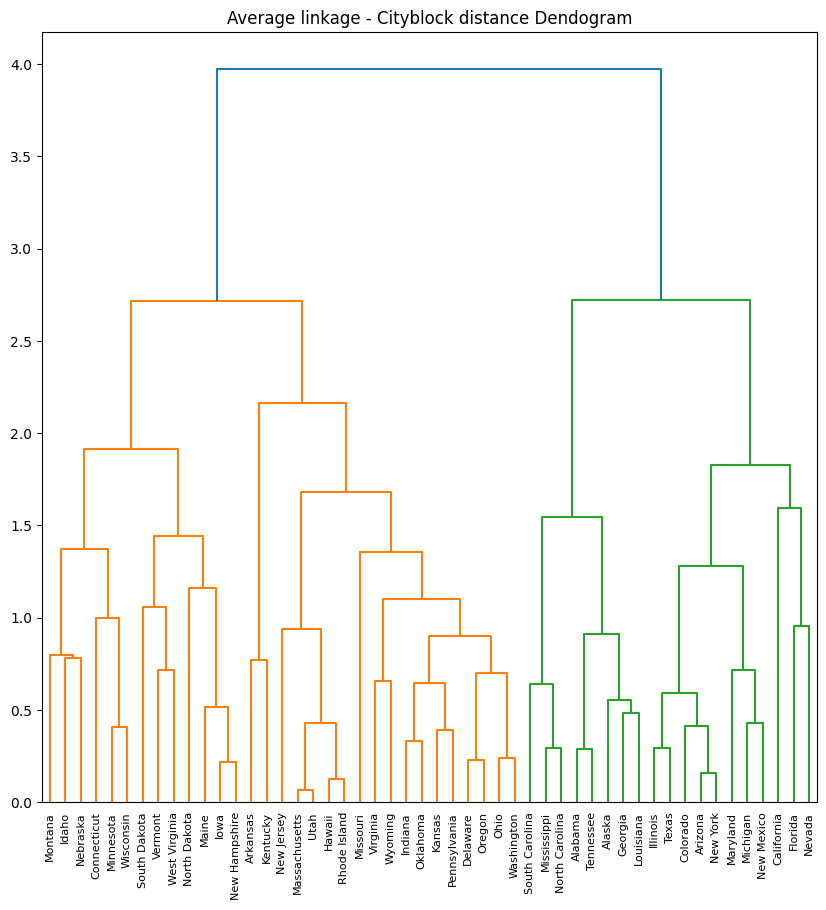

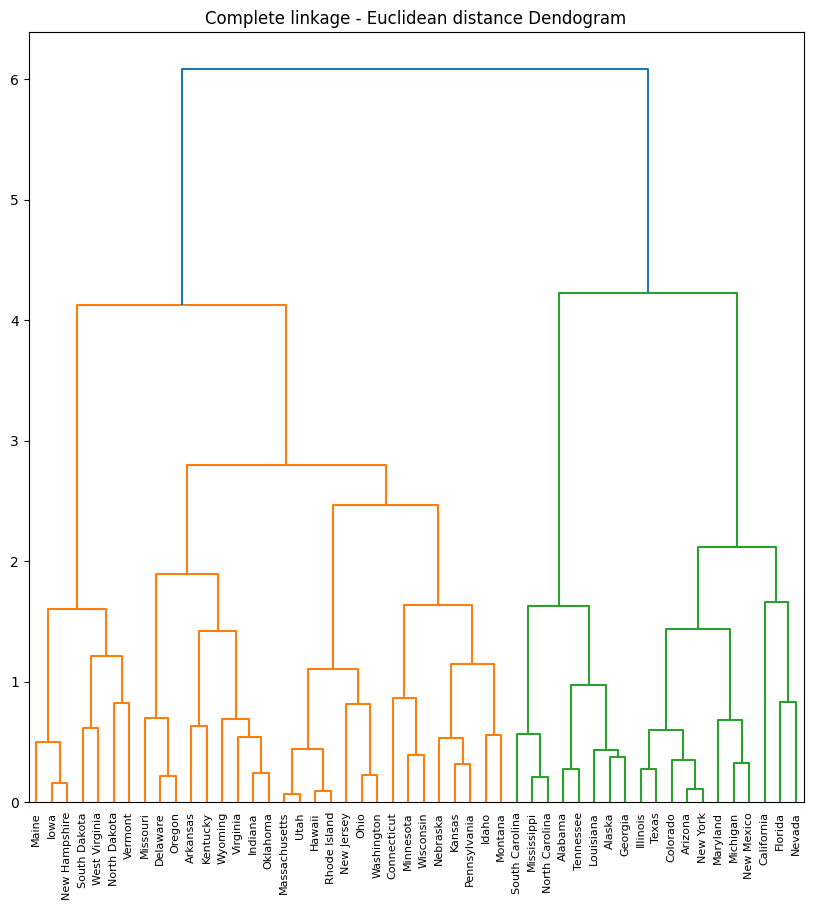

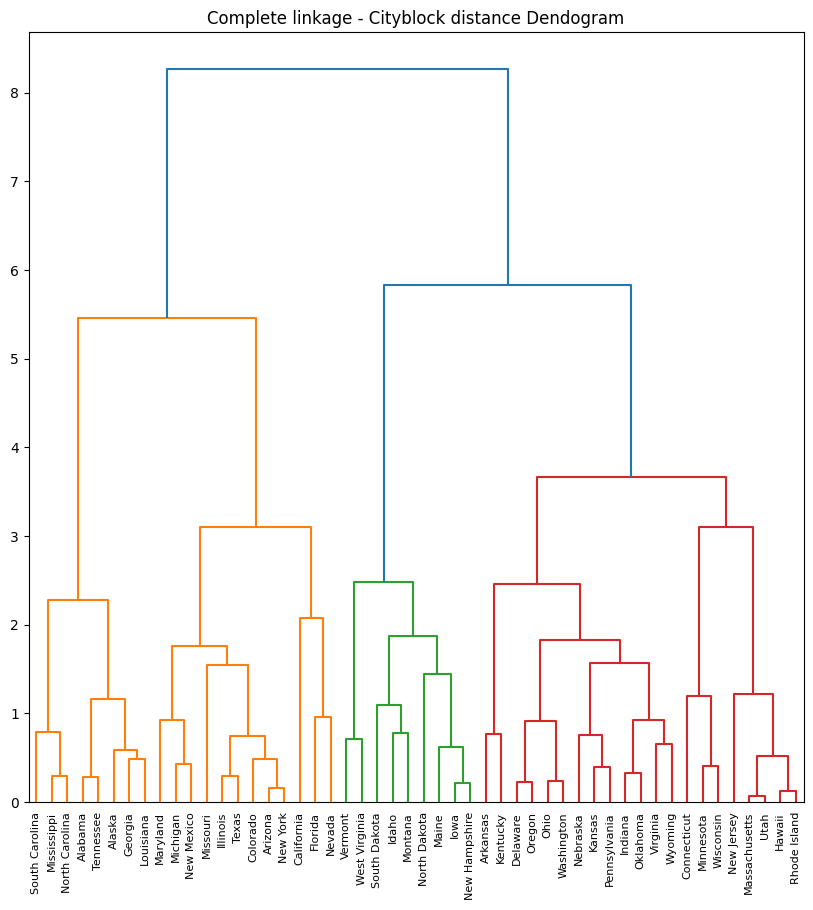

In [31]:
# list containing linkages annd distacne metrics to be used for the plots
link = ['single', 'average','complete']
metr = ['euclidean', 'cityblock']

# for loops to plot dendograms for each linkage and distance metric
for l in link:
    for m in metr:
        plt.figure(figsize=(10,10))
        plt.title(f"{str.capitalize(l)} linkage - {str.capitalize(m)} distance Dendogram")  
        dendo = dendrogram(linkage(x_1, method= l, metric= m), labels=pca_df.index) 
        plt.show()

# Adapted from: Iris.ipynb, L3T08 - Unsupervised Learning - Hierachical Clustering. [Compulsory Task 1]. Retrieved from Dropbox-NK23110009394.

Among the six dendrogram plots presented above, three of them suggest the presence of two distinct clusters in the data. The dissimilarity in the clusters in confirmed by the lengths of the verticle blue lines in the 3 two-cluster dendograms, as they are the longest in all the plot apart from the last and single dendogram with 3 clusters.
Notably, one of these dendrogram plots employs commonly used linkage and distance metrics, namely complete linkage and Euclidean distance (HyperionDev,2021). This alignment with the K Nearest Neighbors technique, which also suggests a k value of 2, serves to reinforce and validate the clustering approach.

Hierachical Cluster plot

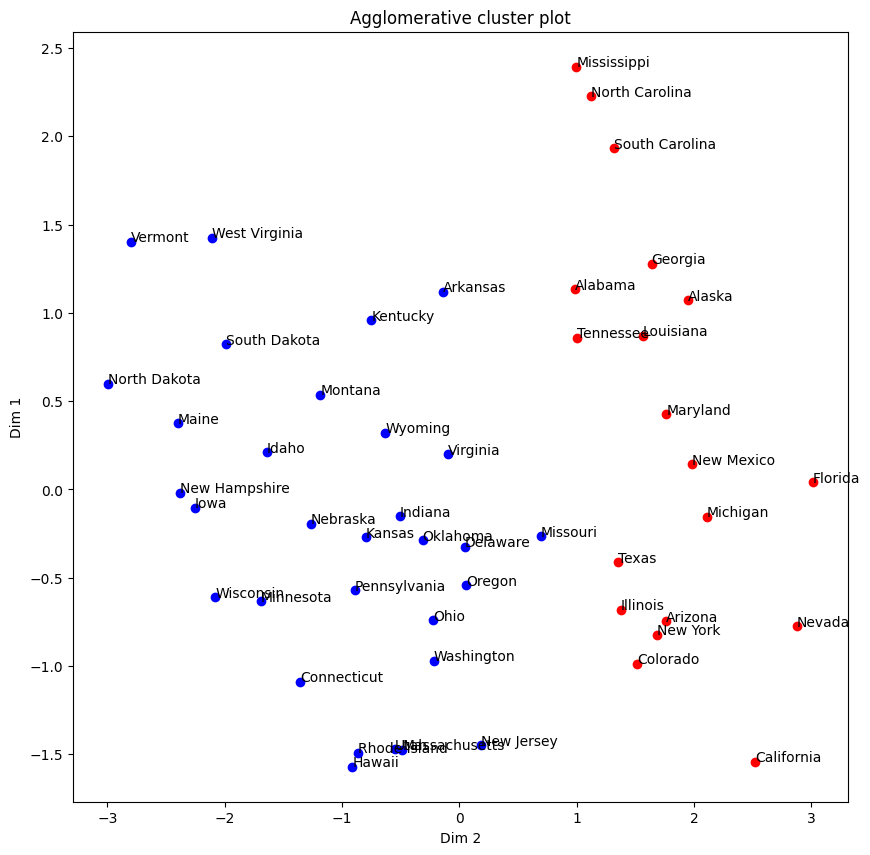

In [34]:
cluster = AgglomerativeClustering(n_clusters=2, metric ='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(pca_df)

# Plot clusters
fig, ax = plt.subplots(figsize=(10,10))
colours = 'rb'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

# for loop for data point  label (which city they represent)
for i in range(0,len(x)):
    txt = cities[i]
    ax.annotate(txt, (x[i], y[i]))
ax.set_title("Agglomerative cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
plt.show()

# Adapted from: https://www.kaggle.com/code/sanikamal/principal-component-analysis-with-kmeans

When contrasting the cluster plots derived from the KNN and Hierarchical Clustering techniques, a notable similarity emerges in their clustering outcomes, with the exception of Missouri. In both techniques, the majority of cities are consistently grouped into clusters exhibiting similar characteristics. However, Missouri stands out as an anomaly, being categorized into the 'high risk' group solely within the results of the Hierarchical Clustering technique. This discrepancy underscores the sensitivity of clustering algorithms to subtle variations in data and methodology, highlighting the importance of careful consideration and validation when interpreting clustering outcomes.

### References

1. HyperionDev. (2021). Unsupervised Learning- Principlal Component Analysis. [Educational notes]. Retrieved from Dropbox-NK23110009394.

2. HyperionDev. (2021). Hierachical Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.